<a href="https://colab.research.google.com/github/Nandinireddy23/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [391]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [392]:
train = pd.read_csv('train.csv')

In [393]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [394]:
test = pd.read_csv('test (1).csv')

In [395]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [396]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [397]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [398]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [399]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [400]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [401]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [402]:
test.isnull().sum()/len(test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [403]:
train.shape

(891, 12)

In [404]:
test.shape

(418, 11)

In [405]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [406]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

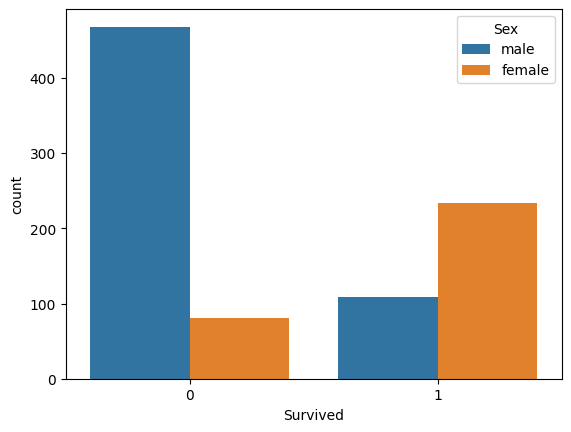

In [407]:
sns.countplot(x ='Survived',hue='Sex', data=train)
plt.show()

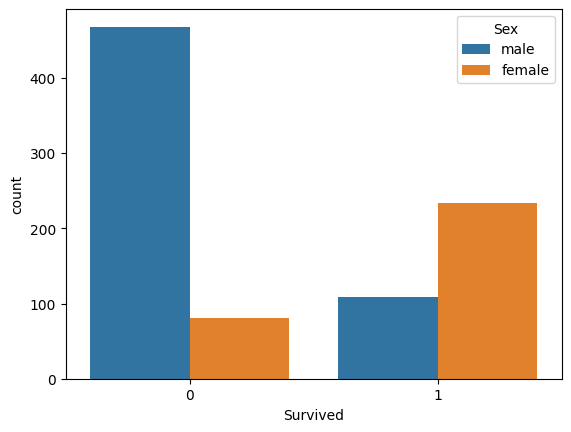

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y = np.linspace(0,50,500)
sns.countplot(x= 'Survived', hue='Sex', data=train)
plt.show()

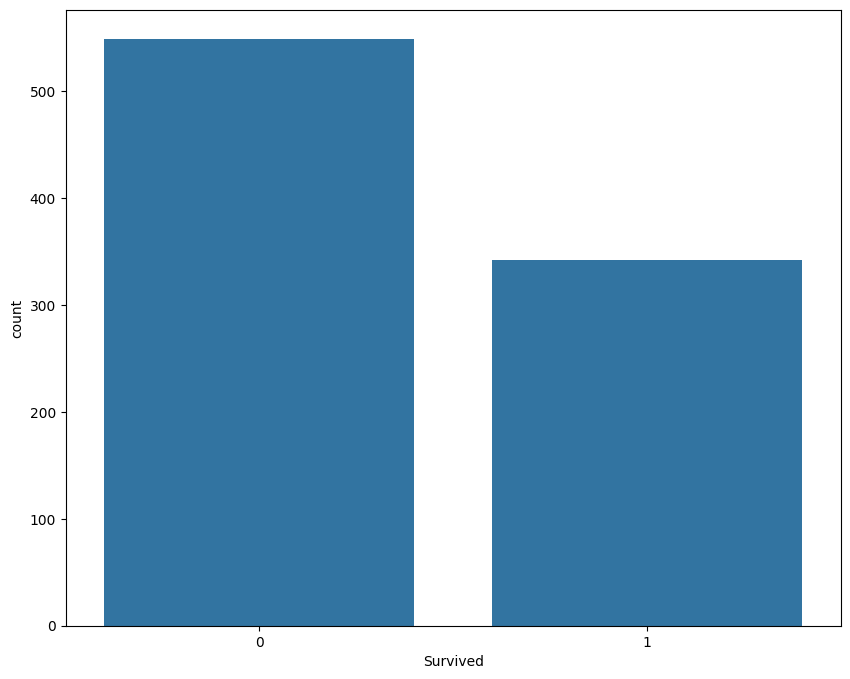

In [409]:
plt.figure(figsize = (10,8))
sns.countplot(x= 'Survived', data=train)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

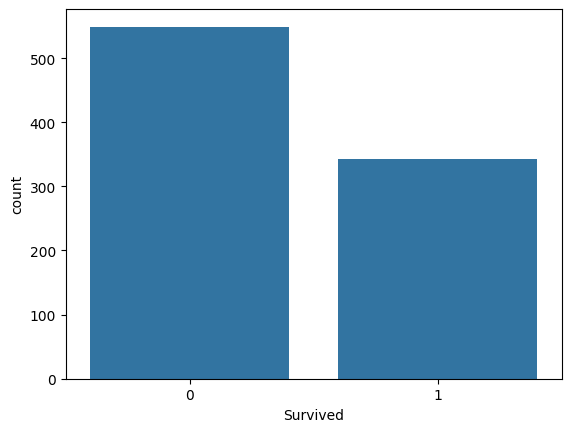

In [410]:
sns.countplot(x= 'Survived', data=train)

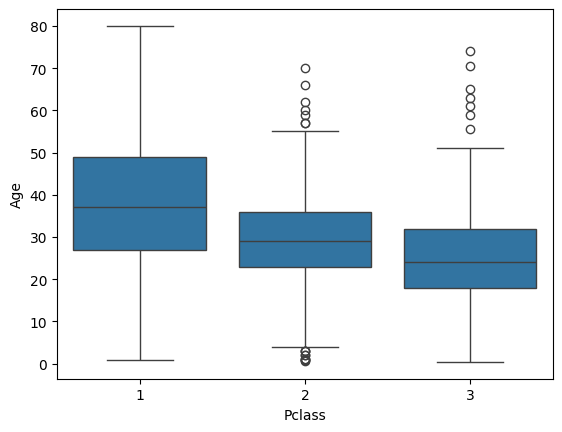

In [411]:
sns.boxplot(x= 'Pclass', y='Age', data=train)
plt.show()

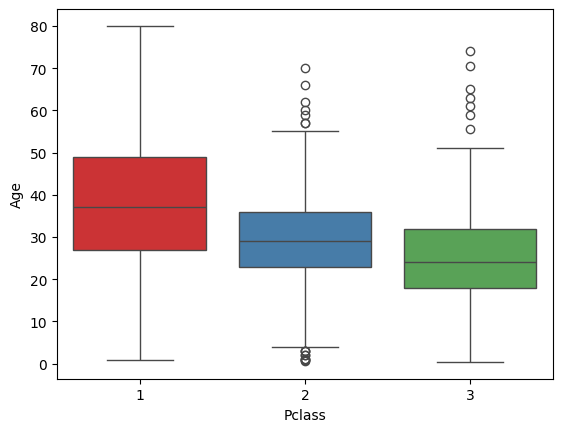

In [412]:
sns.boxplot(x= 'Pclass', y='Age', palette="Set1",data=train)
plt.show()

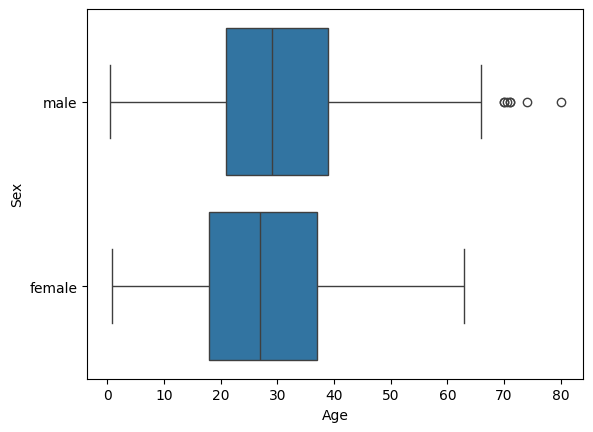

In [413]:
sns.boxplot(x= 'Age', y='Sex', data=train)
plt.show()

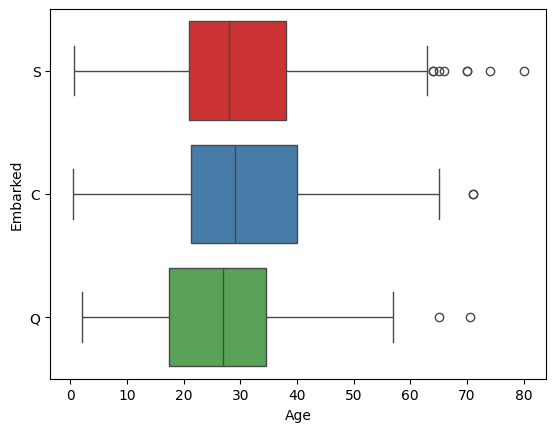

In [414]:
sns.boxplot(x= 'Age', y='Embarked', palette='Set1', data=train)
plt.show()

In [415]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train['Pclass'] == Pclass]['Age'].mean())
    else:
        return Age

In [416]:
train['Age'] = train[['Age','Pclass']].apply(add_age,axis=1)

In [417]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [418]:
test['Age'] = test[['Age','Pclass']].apply(add_age,axis=1)

In [419]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [420]:
test.drop("Cabin",inplace=True,axis=1)

In [421]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [422]:
 #missing values in cabin
 train.drop("Cabin",inplace=True,axis=1)


In [423]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [424]:
# Check if 'Cabin' column exists before dropping
if 'Cabin' in test.columns:
    test.drop("Cabin",inplace=True,axis=1)

In [425]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [426]:
#missing values for embarked column
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [427]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [428]:
#creating new fetures
def combine(df,col1,col2):
    df['Family']=df[col1]+df[col2]
    df.drop(col1,inplace=True,axis=1)
    return df
    train=combine(train,'SibSp','Parch')
    test=combine(test,'SibSp','Parch')


In [429]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [430]:
train["Age"].describe()

count    891.000000
mean      29.252716
std       13.211959
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

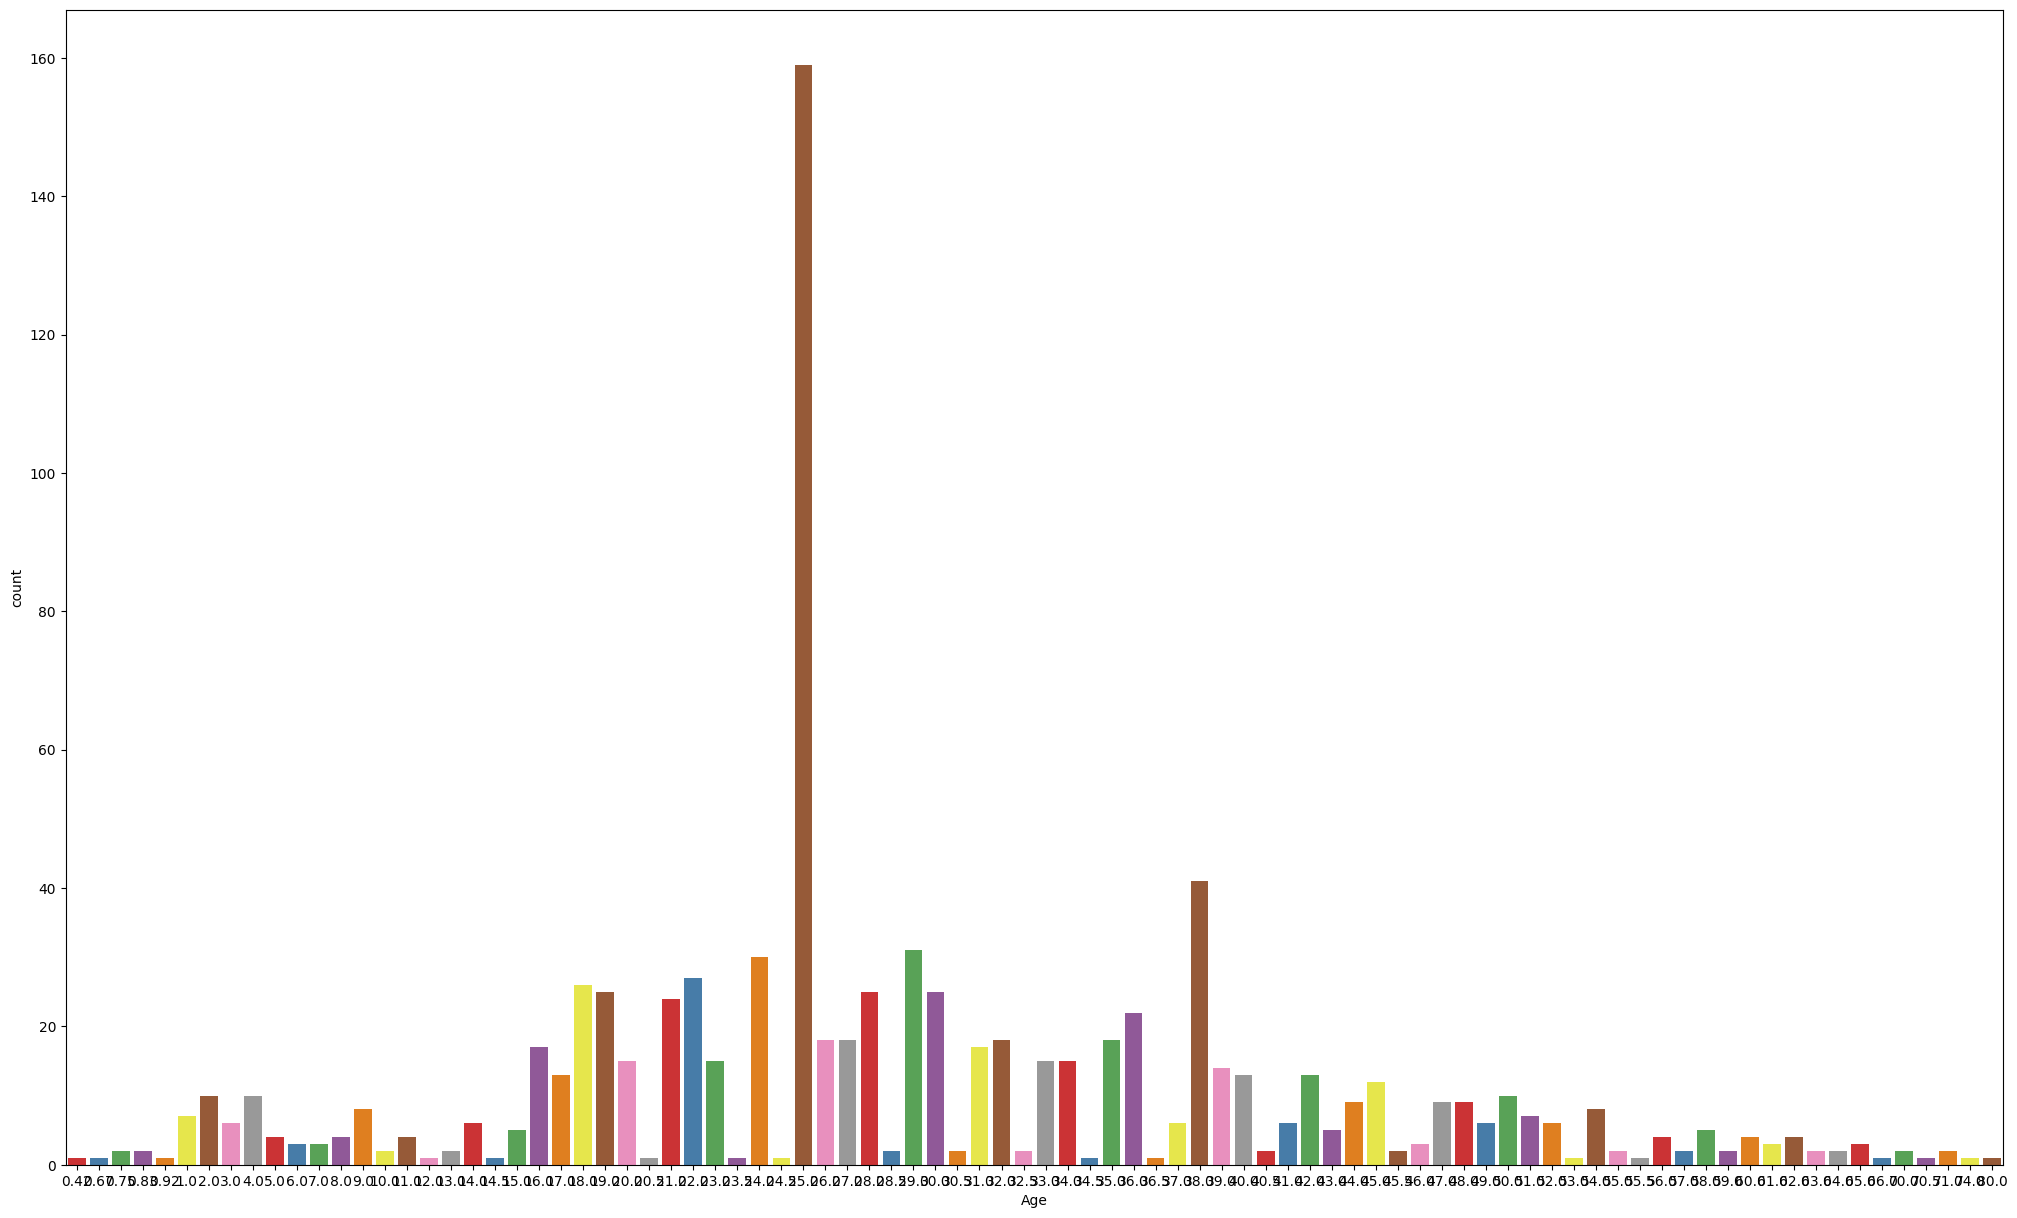

In [431]:
plt.figure(figsize = (25,15))
sns.countplot(x= 'Age', data=train , palette='Set1')
plt.show()

In [432]:
def process_age(df,cut_points,label_names):
    df["Age"]=df["Age"].fillna(-0.5)
    df["Age_categories"]=pd.cut(df["Age"],cut_points, labels=label_names)
    return df
# define cut_points and label_names outside the function to make them accessible
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]


In [433]:
train=process_age(train,cut_points,label_names)

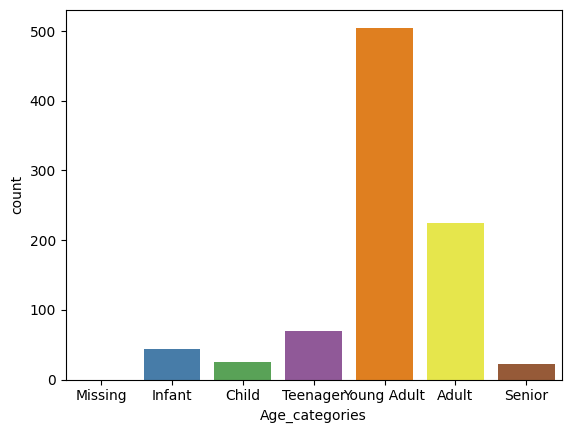

In [434]:
sns.countplot(x= 'Age_categories', data=train , palette='Set1')
plt.show()

In [435]:
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df
test=process_age(test,cut_points,label_names)

In [436]:
for column in["Pclass","Sex","Age_categories","Embarked"]:
    train=create_dummies(train,column)
    test=create_dummies(test,column)

In [437]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,True,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,False,False,True,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,False,True,False,False,False,False,True


In [438]:
train.drop(["Name","Sex","Ticket","Pclass","Age_categories","Embarked"],inplace=True,axis=1)

In [439]:
test.drop(["Name","Sex","Ticket","Pclass","Age_categories","Embarked"],inplace=True,axis=1)

In [440]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,...,False,False,False,False,True,False,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [441]:
train=train.astype(int)

In [442]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False
1,893,47.0,1,0,7.0000,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True
2,894,62.0,0,0,9.6875,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False
3,895,27.0,0,0,8.6625,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True
4,896,22.0,1,1,12.2875,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True


In [443]:
train.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [444]:
col=['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [445]:
lr=LogisticRegression()
lr.fit(train[col],train["Survived"])

LogisticRegression()

In [446]:
x=train[col]
y=train["Survived"]
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [447]:
lr=LogisticRegression()
lr.fit(train_x,train_y)
predictions=lr.predict(val_x)

In [448]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [449]:
df1=pd.DataFrame({'predictions':predictions,"actual_values":val_y})

In [450]:
df1

,predictions,actual_values
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


In [451]:
accuracy=accuracy_score(val_y,predictions)

In [452]:
accuracy

0.8212290502793296

In [453]:
classification_report(val_y,predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.86       110\n           1       0.78      0.75      0.76        69\n\n    accuracy                           0.82       179\n   macro avg       0.81      0.81      0.81       179\nweighted avg       0.82      0.82      0.82       179\n'

In [454]:
scores=cross_val_score(lr,x,y,cv=10)
scores.sort()
accuracy=scores.mean()
print("scores:",scores)
print("accuracy:",accuracy)

scores: [0.7752809  0.7752809  0.78651685 0.80898876 0.82022472 0.82022472
 0.82022472 0.83333333 0.85393258 0.85393258]
accuracy: 0.8147940074906368


In [455]:
x=test[col]

In [456]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22,1,0,7,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,2,1,38,1,0,71,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,3,1,26,0,0,7,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
3,4,1,35,1,0,53,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,5,0,35,0,0,8,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [457]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False
1,893,47.0,1,0,7.0000,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True
2,894,62.0,0,0,9.6875,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False
3,895,27.0,0,0,8.6625,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True
4,896,22.0,1,1,12.2875,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True


In [458]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming 'test' is your DataFrame and 'col' is the list of columns you're using
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median', 'most_frequent'
test_imputed = pd.DataFrame(imputer.fit_transform(test[col]))
test_imputed.columns = test[col].columns  # Restore column names

lr.fit(X, y)  # Assuming you have X and y defined
predictions_test = lr.predict(test_imputed)

In [460]:
df2=pd.DataFrame({"passenger_id":test["PassengerId"],"Survived":predictions_test})

In [461]:
df2.head()

,passenger_id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
